In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Getting Data Ready

In [132]:
oliver_confed_data=pd.read_csv('comments-J5b_-TZwQ0I.csv')


In [19]:
oliver_waste_data=pd.read_csv('comments-ZwY2E0hjGuU.csv')

In [133]:
oliver_confed_data['length_commentText']=oliver_confed_data.commentText.apply(lambda s: s if type(s)==float else len(s))

## first look

In [37]:
oliver_confed_data.tail()

,id,user,date,timestamp,commentText,likes,hasReplies,numberOfReplies,replies.id,replies.user,replies.date,replies.timestamp,replies.commentText,replies.likes,length_commentText
33439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ugwr1YKCFkAPqUYgy214AaABAg.8YUbanEEorY8YUbe4ecJwL,Pablo Zaragoza,1 year ago,1.537106e+12,First* but also fiesta,2.0,NaN
33440,Ugx1f7JLT0LA6jysjQ54AaABAg,Ashleigh Gauch,1 year ago,1.537106e+12,1st,1.0,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0
33441,Ugy00mJ1yo9pdjFvGn94AaABAg,Donut Chan,1 year ago,1.537106e+12,Hi,1.0,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0
33442,Ugziz9jxbS4sW4uK1894AaABAg,Derocax,1 year ago,1.537106e+12,First,8.0,True,1.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0
33443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ugziz9jxbS4sW4uK1894AaABAg.8YUbZaWQKom8YUbcKWVHwP,Derocax,1 year ago,1.537106e+12,Yes!,0.0,NaN


In [7]:
oliver_confed_data.describe()

,timestamp,likes,numberOfReplies,replies.timestamp,replies.likes,length_commentText
count,1.389400e+04,13894.000000,13894.000000,1.955000e+04,19550.000000,13894.000000
mean,1.539515e+12,12.997553,1.407082,1.540580e+12,2.868951,227.248309
std,7.078632e+09,106.434842,6.925759,8.417709e+09,9.969636,397.461773
min,1.537105e+12,0.000000,0.000000,1.537105e+12,0.000000,1.000000
25%,1.537106e+12,0.000000,0.000000,1.537106e+12,0.000000,54.000000
50%,1.537106e+12,0.000000,0.000000,1.537106e+12,0.000000,109.000000
75%,1.537106e+12,0.000000,0.000000,1.537106e+12,2.000000,240.000000
max,1.568631e+12,4684.000000,204.000000,1.568638e+12,492.000000,9896.000000


In [38]:
#print(oliver_confed_data[oliver_confed_data.length_commentText==9896].loc[17221,'commentText'])

(0, 10.5)

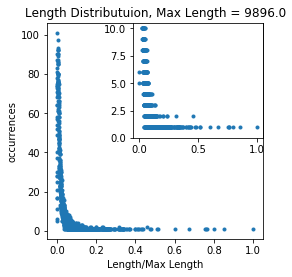

In [43]:
# Creates blank canvas
fig = plt.figure()

axes1 = fig.add_axes([0., 0., .5, .75]) # main axes
axes2 = fig.add_axes([0.2, 0.35, 0.3, 0.4]) # inset axes

# Larger Figure Axes 1
axes1.plot((oliver_confed_data.length_commentText/oliver_confed_data.length_commentText.max()).value_counts(),'.')
axes1.set_xlabel('Length/Max Length')
axes1.set_ylabel('occurrences')
axes1.set_title('Length Distributuion, Max Length = ' + str(oliver_confed_data.length_commentText.max()))

# Insert Figure Axes 2
axes2.plot((oliver_confed_data.length_commentText/oliver_confed_data.length_commentText.max()).value_counts(),'.')
axes2.set_ylim([0, 10.5])
# axes2.set_xlabel('X_label_axes2')
# axes2.set_ylabel('Y_label_axes2')
# axes2.set_title('Axes 2 Title');

(0, 10.5)

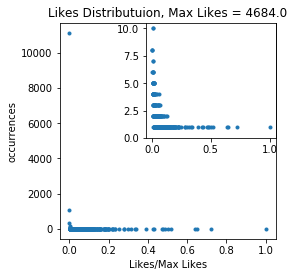

In [69]:
# Creates blank canvas
fig = plt.figure()

axes1 = fig.add_axes([0., 0., .5, .75]) # main axes
axes2 = fig.add_axes([0.2, 0.35, 0.3, 0.4]) # inset axes

# Larger Figure Axes 1
axes1.plot((oliver_confed_data.likes/oliver_confed_data.likes.max()).value_counts(),'.')
axes1.set_xlabel('Likes/Max Likes')
axes1.set_ylabel('occurrences')
axes1.set_title('Likes Distributuion, Max Likes = ' + str(oliver_confed_data.likes.max()))

# Insert Figure Axes 2
axes2.plot((oliver_confed_data.likes/oliver_confed_data.likes.max()).value_counts(),'.')
axes2.set_ylim([0, 10.5])
# axes2.set_xlabel('X_label_axes2')
# axes2.set_ylabel('Y_label_axes2')
# axes2.set_title('Axes 2 Title');

In [111]:
'jesse is me'.find('jes')>0

False

## filter

In [22]:
def extractor(data,Filter=None,top=None,above_num=None,below_num=None,above_precMax=None,below_precMax=None,Has_links=None):
    ''' hi this is a test'''
    if Filter=='Likes':
        col_name='likes'
    if Filter=='Replies':
        col_name='numberOfReplies'
    if Filter=='Length':
        col_name='length_commentText'
    
    
    
    if top!=None:
        return data.sort_values(col_name,ascending=False).head(top)
    if above_num!=None:
        return data[data[col_name]>=above_num]
    if below_num!=None:
        return data[data[col_name]<=below_num]
    if above_precMax!=None:
        return data[data[col_name]>=data[col_name].max()*above_precMax/100]
    if below_precMax!=None:
        return data[data[col_name]<=data[col_name].max()*above_precMax/100]
        
    if Has_links==True:
        return oliver_confed_data[oliver_confed_data['id'].notnull()][oliver_confed_data[oliver_confed_data['id'].notnull()]['commentText'].str.contains('http')]
        

In [177]:
extractor(data=oliver_confed_data, Filter='Replies',top=5)

,id,user,date,timestamp,commentText,likes,hasReplies,numberOfReplies,replies.id,replies.user,replies.date,replies.timestamp,replies.commentText,replies.likes,length_commentText
15113,UgxWL2VpGt7dDPAMSfZ4AaABAg,Dorian McCormick,1 year ago,1.537106e+12,"""Do you know how much a slave costs back then?...",1585.0,True,204.0,NaN,NaN,NaN,NaN,NaN,NaN,105.0
24707,UgwjkVOSQpOp1fu5WlJ4AaABAg,The flamingsword,1 year ago,1.537106e+12,Imagine if Germany started to erect statues of...,2989.0,True,190.0,NaN,NaN,NaN,NaN,NaN,NaN,132.0
25293,UgzM-kPON8V--B-VcB94AaABAg,Laura Margolusová,1 year ago,1.537106e+12,I’m German and imagine if we would have Hitler...,3037.0,True,173.0,NaN,NaN,NaN,NaN,NaN,NaN,105.0
6525,UgyeX-FqDaYxHdLXnvV4AaABAg,Alfred Soul,1 year ago,1.537105e+12,I'm German. Should we just hang Swastikas from...,737.0,True,168.0,NaN,NaN,NaN,NaN,NaN,NaN,131.0
29664,UgzyCA36gBSeGqcYGC14AaABAg,Annie,1 year ago,1.537106e+12,"Being an Indian, the cause of the American Civ...",2006.0,True,141.0,NaN,NaN,NaN,NaN,NaN,NaN,750.0


In [100]:
print(extractor(data=oliver_confed_data, Filter='Replies',top=5).reset_index(drop=True).commentText[4])

Being an Indian, the cause of the American Civil War seemed quite obvious to me from the start. But then I read that not everyone agrees with that. 

Then I saw an episode of Crash Course History where John Green explains how his past self raised the same question to his teacher What about state's rights? 
To which the teacher responded - State's right to WHAT Sir? ( https://youtu.be/roNmeOOJCDY )

Clear as crystal.

EDIT : By Indian, I meant Indian. You know, from India. What I meant by specifying that was 'as an OUTSIDER, the cause was pretty obvious'. 
Also, just because your ignorant white ancestors made a stupid mistake, stop rolling with it. Those people are native Americans. There is absolutely no reason this madness should continue.


In [ ]:
extractor(data=oliver_confed_data,filter='Likes',top=#)
extractor(data=oliver_confed_data,filter='Replies',top=#)
extractor(data=oliver_confed_data,filter='Length',top=#)
extractor(data=oliver_confed_data,filter='Likes',above=%/below=%)
extractor(data=oliver_confed_data,filter=['critical','Likes'],top=#)
extractor(data=oliver_confed_data,filter=['supportive','Likes'],above=%/below=%)




         

In [50]:
monkeys=None
if monkeys==None:
    print('None')
else:
    print('not None')


None


In [113]:
oliver_confed_data[oliver_confed_data['commentText'].find('crowder')]

AttributeError: 'Series' object has no attribute 'find'

In [118]:
oliver_confed_data['commentText'].str.contains('crowder')

0        False
1        False
2        False
3        False
4        False
         ...  
33439      NaN
33440    False
33441    False
33442    False
33443      NaN
Name: commentText, Length: 33444, dtype: object

In [158]:
oliver_confed_data[oliver_confed_data['id'].notnull()][oliver_confed_data[oliver_confed_data['id'].notnull()]['commentText'].str.contains('http')].head()

,id,user,date,timestamp,commentText,likes,hasReplies,numberOfReplies,replies.id,replies.user,replies.date,replies.timestamp,replies.commentText,replies.likes,length_commentText
54,UgxUNTHqSKbTNjQbtY94AaABAg,AE Devereux,1 week ago,1.568037e+12,"Mr. Oliver, should the statue of Bomber Harri...",0.0,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,204.0
85,UgyyJRhiHDhhZUZJNmZ4AaABAg,Drake Koefoed,1 week ago,1.568037e+12,https://www.huffpost.com/entry/rethinkin-linco...,0.0,True,1.0,NaN,NaN,NaN,NaN,NaN,NaN,250.0
109,UgyTG6K5_SV4wOxsPmh4AaABAg,AE Devereux,2 weeks ago,1.567432e+12,"@JustFlemishMe ""Alright, I'm in this comment ...",0.0,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3627.0
253,UgwYgxtbDRaG-842rcB4AaABAg,weldrocks,1 month ago,1.565963e+12,https://www.ebay.com/itm/1968-Dodge-Charger/19...,0.0,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,95.0
352,Ugy-YEsJrp0nAc81SaV4AaABAg,Robert Jordan,1 month ago,1.565963e+12,"In my town, back in 1910, the Board of Supervi...",0.0,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,490.0


In [178]:
print(oliver_confed_data.loc[85,'commentText'])

https://www.huffpost.com/entry/rethinkin-lincoln-on-the_b_2294455


wrong.  the union won, so it wrote a little virtue signaling in.  the north didn't care about the slaves, and still doesn't.  most confederates did not own slaves.  only the rich did


In [16]:

#print(extractor(data=oliver_confed_data, Filter='Length',top=5).reset_index(drop=True).commentText[3])

In [23]:
oliver_confed_data.reset_index()

AttributeError: module 'pandas' has no attribute 'reset_index'

## Label comments

In [143]:
# oliver_confed_data['agree_score']= np.nan
# oliver_confed_data['substance_score']= np.nan
# oliver_confed_data['mean_comment']= np.nan

In [24]:
# create a way to pick comments at random, keep track of what we have picked
# print a comment 
# rate by agree, substance and mean
# repeat (just run first line again)

In [152]:
# create an array of indecis we have done this round
#Indecies_marked=[]

In [145]:

# create a way to pick comments at random, keep track of what we have picked

#pick a random index of an orignial comment(not a reply) that we have not used yet
def new_index():
    new=False
    while new==False:
        rand=np.random.randint(1,len(oliver_confed_data[oliver_confed_data['id'].notnull()]))
        new_indexn=oliver_confed_data[oliver_confed_data['id'].notnull()].index[rand]
        # check to see if its one we have done before
        if new_indexn not in Indecies_marked:
            new=True
    return new_indexn


In [256]:
# print a comment
new=new_index()
print(oliver_confed_data.loc[new,'commentText'])

In school we learned that the war was not about slavery so I’m very confused


In [257]:
# rate by agree, substance and mean
# agree score
oliver_confed_data['agree_score'].iloc[new]=3

# substance_score
oliver_confed_data['substance_score'].iloc[new]=3

# mean_comment
oliver_confed_data['mean_comment'].iloc[new]= 'n'

Indecies_marked+=[new]


In [261]:
oliver_confed_data.iloc[new][-3:]

agree_score        3
substance_score    3
mean_comment       n
Name: 6334, dtype: object

In [259]:
len(Indecies_marked)

30

In [260]:
oliver_confed_data.iloc[new]

id                                            UgxhEdSUfujzFWtc-vV4AaABAg
user                                                           james 224
date                                                          1 year ago
timestamp                                                    1.53711e+12
commentText            In school we learned that the war was not abou...
likes                                                                  0
hasReplies                                                         False
numberOfReplies                                                        0
replies.id                                                           NaN
replies.user                                                         NaN
replies.date                                                         NaN
replies.timestamp                                                    NaN
replies.commentText                                                  NaN
replies.likes                                      